Copyright (c) 2025 Mitsuru Ohno  
Use of this source code is governed by a BSD-3-style  
license that can be found in the LICENSE file.  

## 当ノートブックのワークフロー  
1. csvに書き込んだ反応式を読み込む。ただし速度定数はすべて既知とする  
2. 化学種ごとの微分型の反応速度式を作成する  
3. 作成した微分方程式を、数値解析可能な形式にする  
4. 化学種ごとの濃度の経時変化を求める  
5. 経時変化を図示する  

## 使用方法の要約
基本的な使用: RxnIVPsolv("sample_data.csv")でインスタンス化  
数値積分: get_ode_system()で必要なオブジェクトを取得  
エラーハンドリング: try-except文でエラーをキャッチ  
可視化: matplotlibで結果をプロット  
パラメータ解析: 異なる初期条件での比較  
これらの使用例は、現在のコードが正しく動作することを前提としています。もしエラーが発生した場合は、debug_ode_system()メソッドで詳細な情報を確認できます。  

## 反応式を記載したcsvファイルを指定する  

In [1]:
file_path = '../sample_data/ref1/sample_rxn_ref1a.csv'  # CSVファイルのパスを指定

In [2]:
# development phase
# Add the parent directory (one level up from the notebook's location) to the Python path
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '..'))

## 反応速度式をscipy.integrate.solve_ivpで処理できる連立微分方程式にする  

In [3]:
from dataclasses import dataclass, field
from typing import Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from src.rxnfit.build_ode import RxnODEbuild
from src.rxnfit.solv_ode import SolverConfig, RxnODEsolver
from src.rxnfit.expdata_reader import expdata_read

In [4]:
builded_rxnode = RxnODEbuild(file_path)

In [5]:
builded_rxnode.get_ode_info(debug_info=True)

number of species: 4
unique species: ['AcOEt', 'H2O', 'AcOH', 'EtOH']
rate constant: {'k1': 0.000123, 'k2': 0.000709}

=== debug info ===
Successfully created function for AcOEt with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
Successfully created function for H2O with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
Successfully created function for AcOH with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
order of args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
system of ODE: {'AcOEt': '-k1*AcOEt(t)*H2O(t)+k2*AcOH(t)*EtOH(t)', 'H2O': '-k1*AcOEt(t)*H2O(t)+k2*AcOH(t)*EtOH(t)', 'AcOH': 'k1*AcOEt(t)*H2O(t)-k2*AcOH(t)*EtOH(t)', 'EtOH': 'k1*AcOEt(t)*H2O(t)-k2*AcOH(t)*EtOH(t)'}


In [6]:
builded_rxnode.rate_consts_dict

{'k1': 0.000123, 'k2': 0.000709}

## 数値積分を実行する  

In [7]:
# get_ode_infoの出力を参照して、初期値等の入力項目を渡す
config = SolverConfig(
    y0 = [0.5578, 51.63, 0.013, 0.013], # 初期濃度（必須）
    t_span=(0, 1800),         # 時間範囲（必須）
    # t_eval: Optional[np.ndarray] = field(default=None),  # 任意
    method = "RK45",  # 任意
    rtol = 1e-6,    # 任意    
)

In [8]:
# 基本的な数値積分 -インスタンス化-
solved_rxnode = RxnODEsolver(builded_rxnode, config)

In [9]:
ode_construct, sol = solved_rxnode.solve_system()

Successfully created function for AcOEt with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
Successfully created function for H2O with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
Successfully created function for AcOH with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'H2O', 'AcOH', 'EtOH']


## 実験データを読み込む  

In [10]:
file_path_data = '../sample_data/ref1/sample_timecourse_ref1.csv' # データファイルのパス
df1 = pd.read_csv(file_path_data)

expdata_read([df1,])  # 複数データフレームのリストを渡すとまとめて読み込み可能

[([array([   0.  ,    5.13,   12.95,   18.15,   29.08,   40.18,   51.15,
            61.7 ,   74.75,   91.33,  106.58,  127.57,  147.88,  181.  ,
           210.7 ,  240.85,  300.72,  367.65,  420.97,  486.52,  555.48,
          1569.3 , 1712.15]),
   array([   0.  ,    5.13,   12.95,   18.15,   29.08,   40.18,   51.15,
            61.7 ,   74.75,   91.33,  106.58,  127.57,  147.88,  181.  ,
           210.7 ,  240.85,  300.72,  367.65,  420.97,  486.52,  555.48,
          1569.3 , 1712.15]),
   array([   0.  ,    5.13,   12.95,   18.15,   29.08,   40.18,   51.15,
            61.7 ,   74.75,   91.33,  106.58,  127.57,  147.88,  181.  ,
           210.7 ,  240.85,  300.72,  367.65,  420.97,  486.52,  555.48,
          1569.3 , 1712.15]),
   array([   0.  ,    5.13,   12.95,   18.15,   29.08,   40.18,   51.15,
            61.7 ,   74.75,   91.33,  106.58,  127.57,  147.88,  181.  ,
           210.7 ,  240.85,  300.72,  367.65,  420.97,  486.52,  555.48,
          1569.3 , 1712.15])],
  [


=== Time-course plot ===


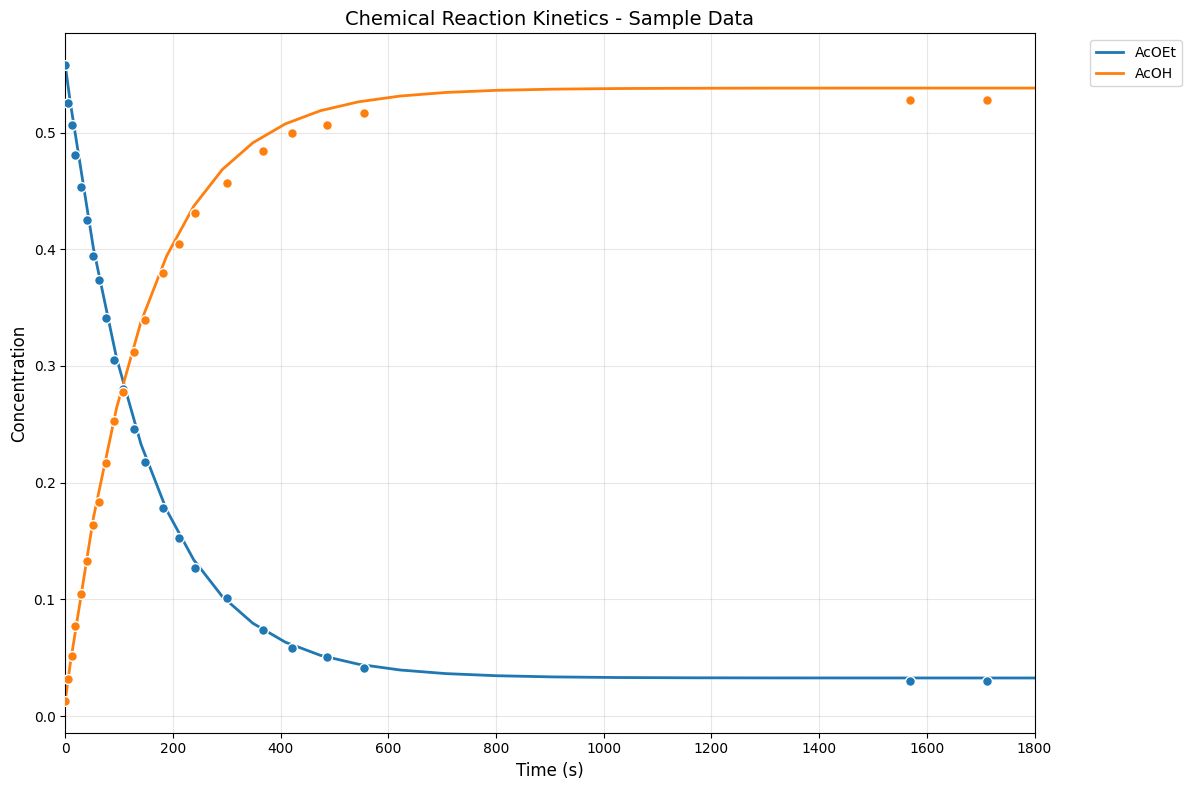


=== Concentration at the final time point ===
AcOEt: 0.032665
AcOH: 0.538135


In [11]:
solved_rxnode.solution_plot(expdata_df=df1, species=['AcOEt', 'AcOH'])